##  Housing Data Exploration and Insights
This notebook performs exploratory data analysis (EDA) and preprocessing on a housing dataset. It includes steps for data loading, cleaning, and preparing the dataset for further analysis.

In [91]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns

In [92]:
# Reading the housing dataset from CSV file
house=pd.read_csv('house_prices.csv')

In [93]:
# Displaying the first few rows to get an overview of the data
house.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [94]:
# Checking column data types and null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [95]:
# Getting statistical summary of numerical features
house.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


In [96]:
# Checking dataset dimensions (rows, columns)
house.shape

(187531, 21)

In [97]:
# Filling missing values in selected categorical columns with 'Unknown'
cols_to_fill_unknown = ['Description', 'facing', 'overlooking', 'Ownership']
house[cols_to_fill_unknown] = house[cols_to_fill_unknown].fillna('Unknown')

In [98]:
# Displaying the first few rows to get an overview of the data
house.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,Unknown,Unknown,Srushti Siddhi Mangal Murti Complex,1,2,NaN,Unknown,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,Unknown,Unknown,NaN,1,1,NaN,Unknown,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [99]:
# Filling missing Price values with the mean price
mean_price = house['Price (in rupees)'].mean()
house['Price (in rupees)'] = house['Price (in rupees)'].fillna(mean_price)

#house['Price (in rupees)'].fillna(mean_price, inplace=True)

In [100]:
# Displaying the first few rows to get an overview of the data
house.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,Unknown,Unknown,Srushti Siddhi Mangal Murti Complex,1,2,NaN,Unknown,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,7583.771885,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,Unknown,Unknown,NaN,1,1,NaN,Unknown,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [101]:
# Filling missing values in selected categorical columns with their mode
cols_to_fill_mode = ['Status', 'Transaction', 'Furnishing']
for col in cols_to_fill_mode:
    mode_val = house[col].mode().iloc[0]
    house[col] = house[col].fillna(mode_val)
    

In [102]:
# Converting Bathroom and Balcony columns to numeric values
house['Bathroom'] = pd.to_numeric(house['Bathroom'], errors='coerce')
house['Balcony'] = pd.to_numeric(house['Balcony'], errors='coerce')

In [104]:
# Filling missing Bathroom and Balcony values with their respective means
mean_bathroom = house['Bathroom'].mean()
mean_balcony = house['Balcony'].mean()
house['Bathroom']=house['Bathroom'].fillna(mean_bathroom)
house['Balcony']=house['Balcony'].fillna(mean_balcony)

In [105]:
# Displaying the first few rows to get an overview of the data
house.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,Unknown,Unknown,Srushti Siddhi Mangal Murti Complex,1.0,2.000000,NaN,Unknown,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2.0,2.000354,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2.0,2.000354,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,7583.771885,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,Unknown,Unknown,NaN,1.0,1.000000,NaN,Unknown,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2.0,2.000354,1 Covered,Co-operative Society,NaN,NaN,NaN


In [106]:
house.loc[house['Bathroom'] == '>10', 'Bathroom'] = 11
house['Bathroom'] = house['Bathroom'].astype(int)

house.loc[house['Balcony'] == '>10', 'Balcony'] = 11
house['Balcony'] = house['Balcony'].astype(int)

In [107]:
house

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,Unknown,Unknown,Srushti Siddhi Mangal Murti Complex,1,2,NaN,Unknown,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,2,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,2,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,7583.771885,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,Unknown,Unknown,NaN,1,1,NaN,Unknown,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,2,1 Covered,Co-operative Society,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.000000,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.000000,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,2,1 Covered,Unknown,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.000000,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.000000,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,Unknown,Main Road,Friends Enclave,2,2,NaN,Unknown,709 sqft,NaN,NaN


In [109]:
print(house.isnull().sum())

Index                     0
Title                     0
Description               0
Amount(in rupees)         0
Price (in rupees)         0
location                  0
Carpet Area           80673
Status                    0
Floor                  7077
Transaction               0
Furnishing                0
facing                    0
overlooking               0
Society              109678
Bathroom                  0
Balcony                   0
Car Parking          103357
Ownership                 0
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64


In [110]:
house[['Carpet Area','Floor']]

,Carpet Area,Floor
0,500 sqft,10 out of 11
1,473 sqft,3 out of 22
2,779 sqft,10 out of 29
3,530 sqft,1 out of 3
4,635 sqft,20 out of 42
...,...,...
187526,NaN,2 out of 4
187527,NaN,4 out of 6
187528,1250 sqft,1 out of 3
187529,NaN,2 out of 2


In [111]:
def convert_to_sqft(area):
    try:
        if pd.notnull(area):
            if 'sqft' in area:
                area = float(area.replace(' sqft', ''))
            else:
                area = float(area.replace(' sqm', '')) * 10.7639  # Convert square meters to square feet
            return area
    except ValueError:
        return np.nan
house['Carpet Area'] = house['Carpet Area'].apply(convert_to_sqft)

# Impute missing values in 'Carpet Area' with mean
mean_carpet_area = house['Carpet Area'].mean()
house['Carpet Area']=house['Carpet Area'].fillna(mean_carpet_area)

# Convert 'Carpet Area' back to a string with the 'sqft' suffix
house['Carpet Area'] = house['Carpet Area'].astype(int).astype(str) + ' sqft'
mode_floor = house['Floor'].mode().iloc[0]
house['Floor']=house['Floor'].fillna(mode_floor)

# Verify if all null values have been handled
print(house.isnull().sum())

Index                     0
Title                     0
Description               0
Amount(in rupees)         0
Price (in rupees)         0
location                  0
Carpet Area               0
Status                    0
Floor                     0
Transaction               0
Furnishing                0
facing                    0
overlooking               0
Society              109678
Bathroom                  0
Balcony                   0
Car Parking          103357
Ownership                 0
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64


In [112]:
house.drop(columns=['Society', 'Car Parking', 'Super Area', 'Dimensions', 'Plot Area'], inplace=True)

In [113]:
print(house.isnull().sum())

Index                0
Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64


In [114]:
house[['Amount(in rupees)','Carpet Area']]

,Amount(in rupees),Carpet Area
0,42 Lac,500 sqft
1,98 Lac,473 sqft
2,1.40 Cr,779 sqft
3,25 Lac,530 sqft
4,1.60 Cr,635 sqft
...,...,...
187526,63 Lac,1267 sqft
187527,55 Lac,1267 sqft
187528,76 Lac,1250 sqft
187529,30 Lac,1267 sqft


In [70]:
def convert_amount(amount):
    try:
        if 'Lac' in amount:
            amount = amount.replace('Lac', '').strip()
            return float(amount) * 100000  # Convert Lac to rupees (1 Lac = 100000 rupees)
        elif 'Cr' in amount:
            amount = amount.replace('Cr', '').strip()
            return float(amount) * 10000000  # Convert Cr to rupees (1 Cr = 10000000 rupees)
        else:
            return float(amount)
    except ValueError:
        return None
house['Amount(in rupees)'] = house['Amount(in rupees)'].apply(convert_amount)
def convert_carpet_area(area):
    try:
        if 'sqft' in area:
            area = area.replace('sqft', '').strip()
            return float(area)  # Convert to square feet
        elif 'sqm' in area:
            area = area.replace('sqm', '').strip()
            return float(area) * 10.7639  # Convert square meters to square feet (1 sqm = 10.7639 sqft)
        else:
            return None
    except ValueError:
        return None
house['Carpet Area'] =house['Carpet Area'].apply(convert_carpet_area)

# Rename the columns to reflect the converted units
house.rename(columns={'Amount(in rupees)': 'Amount in rupees', 'Carpet Area': 'Carpet Area in sqft'}, inplace=True)

# Verify the changes
house.head()

,Index,Title,Description,Amount in rupees,Price (in rupees),location,Carpet Area in sqft,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [115]:
# Checking column data types and null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        187531 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  187531 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        187531 non-null  object 
 7   Status             187531 non-null  object 
 8   Floor              187531 non-null  object 
 9   Transaction        187531 non-null  object 
 10  Furnishing         187531 non-null  object 
 11  facing             187531 non-null  object 
 12  overlooking        187531 non-null  object 
 13  Bathroom           187531 non-null  int32  
 14  Balcony            187531 non-null  int32  
 15  Ownership          187531 non-null  object 
dtypes:

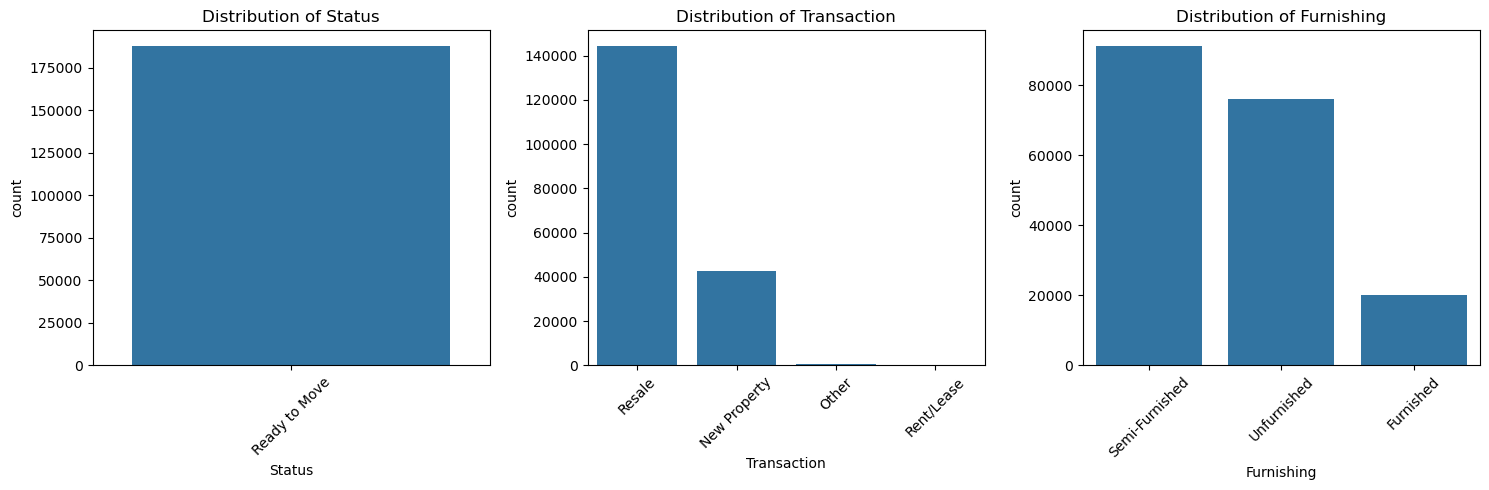

In [119]:

import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ["Status", "Transaction", "Furnishing"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=house, x=col, order=house[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


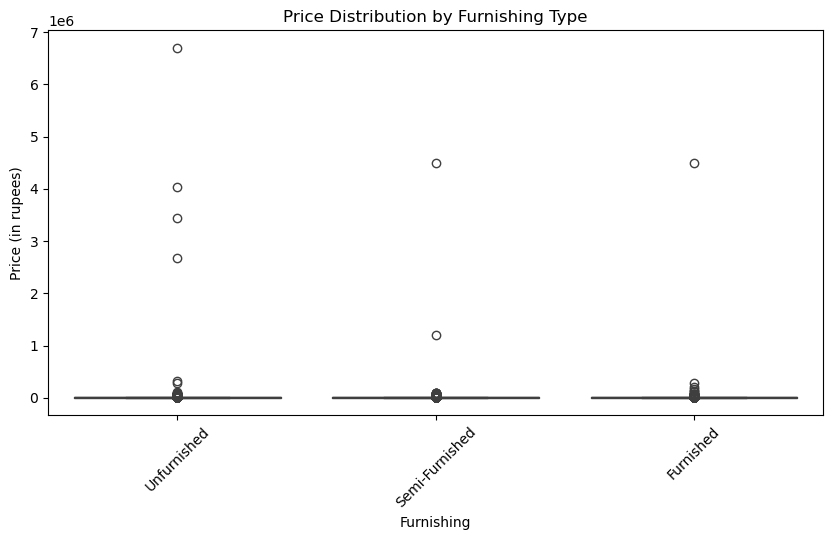

In [120]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=house, x="Furnishing", y="Price (in rupees)")
plt.title("Price Distribution by Furnishing Type")
plt.xticks(rotation=45)
plt.show()


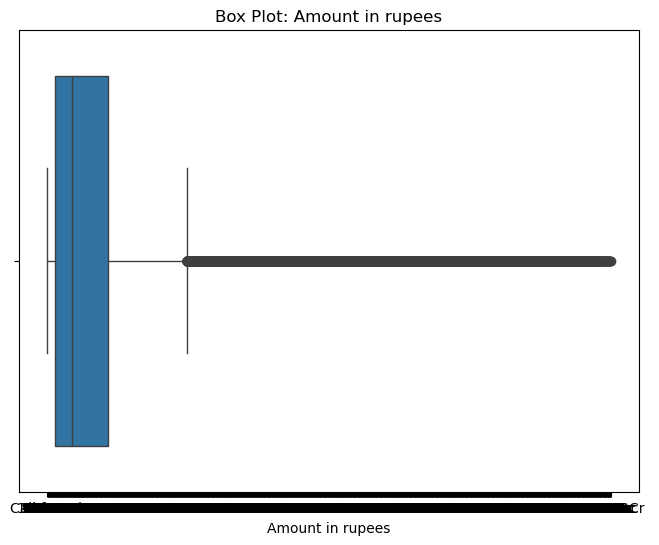

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount(in rupees)', data=house)
plt.title("Box Plot: Amount in rupees")
plt.xlabel("Amount in rupees")
plt.show()

In [122]:
house.drop(columns=['Title','Description','Status'],inplace=True)

In [123]:
# Displaying the first few rows to get an overview of the data
house.head()

,Index,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,42 Lac,6000.000000,thane,500 sqft,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,1,98 Lac,13799.000000,thane,473 sqft,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2,1.40 Cr,17500.000000,thane,779 sqft,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,3,25 Lac,7583.771885,thane,530 sqft,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,4,1.60 Cr,18824.000000,thane,635 sqft,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [124]:
from sklearn.preprocessing import LabelEncoder
# Function to perform Label Encoding for multiple columns
def label_encode_multiple(house, columns):
    le = LabelEncoder()
    for column in columns:
        house[column] = le.fit_transform(house[column])
    return house

label_encode_columns = ['location','Transaction','Floor', 'Furnishing', 'facing', 'overlooking', 'Ownership']
house = label_encode_multiple(house, label_encode_columns)

In [125]:
# Checking column data types and null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Amount(in rupees)  187531 non-null  object 
 2   Price (in rupees)  187531 non-null  float64
 3   location           187531 non-null  int32  
 4   Carpet Area        187531 non-null  object 
 5   Floor              187531 non-null  int32  
 6   Transaction        187531 non-null  int32  
 7   Furnishing         187531 non-null  int32  
 8   facing             187531 non-null  int32  
 9   overlooking        187531 non-null  int32  
 10  Bathroom           187531 non-null  int32  
 11  Balcony            187531 non-null  int32  
 12  Ownership          187531 non-null  int32  
dtypes: float64(1), int32(9), int64(1), object(2)
memory usage: 12.2+ MB


In [129]:
house

,Index,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,42 Lac,6000.000000,67,500 sqft,40,3,2,7,19,1,2,4
1,1,98 Lac,13799.000000,67,473 sqft,551,3,1,0,0,2,2,1
2,2,1.40 Cr,17500.000000,67,779 sqft,58,3,2,0,0,2,2,1
3,3,25 Lac,7583.771885,67,530 sqft,24,3,2,7,19,1,1,4
4,4,1.60 Cr,18824.000000,67,635 sqft,381,3,2,8,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,63 Lac,3225.000000,80,1267 sqft,350,0,1,0,0,3,3,1
187527,187527,55 Lac,3274.000000,80,1267 sqft,668,3,2,2,1,3,2,4
187528,187528,76 Lac,4343.000000,80,1250 sqft,24,3,0,0,1,3,2,1
187529,187529,30 Lac,4231.000000,80,1267 sqft,331,3,1,7,7,2,2,4
